In [30]:
'''
@File    :   KNN.ipynb
@Time    :   2023/05/16 15:31:59
@Version :   1.0
@Author  :   Yacan Man
@Email   :   myxc@live.cn
@WebSite :   https://blog.manyacan.com
'''

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## KNN basics

### data preparation

In [31]:
raw_data_x = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)

In [32]:
demo_point = np.array([8.093607318,3.365731514])

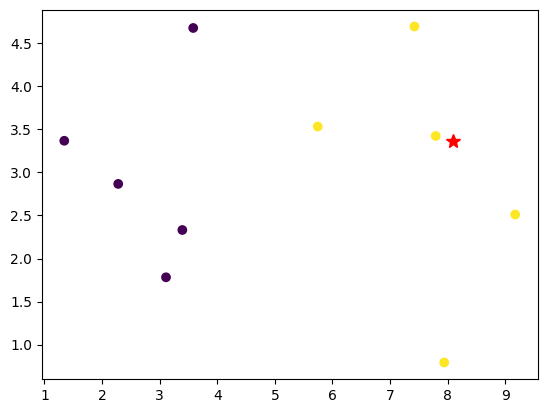

In [33]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.plot(demo_point[0], demo_point[1], 'r*', markersize=10)

### KNN's implementation process

欧拉距离公式：

$$
D_{(x, y)}-\sqrt{(x_1-y_1)^2+(x_2-y_2)^2+\cdots +(x_n-y_n)^2} =\sqrt{\sum_{i=1}^{n}(x_i-y_i)^2 } 
$$

In [34]:
dis = []  # Storage test data point to the distance from each point in the figure

for x in x_train:  # Each point in the traversal map, calculate the distance from Euclidean Distance of the test point
    dis.append(np.sqrt(np.sum((x-demo_point)**2)))

print(dis)  # The distance result of printing calculation


[4.812566907609877, 5.229270827235305, 6.749798999160064, 4.6986266144110695, 5.83460014556857, 1.4900114024329525, 2.354574897431513, 1.3761132675144652, 0.3064319992975, 2.5786840957478887]


In [36]:
[dis.index(i) for i in list(sorted(dis))]

[8, 7, 5, 6, 9, 3, 0, 1, 4, 2]

In [37]:
sort_dis = np.argsort(dis)
sort_dis

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [38]:
K = 6
top_k_y = [y_train[i] for i in sort_dis[:K]]
top_k_y

[1, 1, 1, 1, 1, 0]

In [39]:
from collections import Counter
votes = Counter(top_k_y).most_common(1)[0]
print(f'The result of KNN is {votes[0]}, probability is {votes[1]}/{K}.')

The result of KNN is 1, probability is 5/6.


## Package KNN function

In [40]:
# Import packages
import numpy as np
from collections import Counter

# The function of KNN
def KNN_classify(k, x_train, y_train, find_point):
    """The function of KNN

    Args:
        k (int): Calculate the nearest K point
        x_train (np.array): Training data set
        y_train (np.array): Training data label
        find_point (np.array): The point you need to find
    """
    # Check input data weather are valid
    assert 1<= k <= x_train.shape[0], f'{k} value must be valid!'
    assert x_train.shape[0] == y_train.shape[0], f'The size of {x_train} must equal to the size of {y_train}!'
    assert find_point.shape[0] == x_train.shape[1], f'The feature number of {find_point} must be equal to {x_train}'

    # Calculation distance
    dis = [np.sqrt(np.sum((x-demo_point)**2)) for x in x_train]
    sort_index = np.argsort(dis)
    top_k_y = [y_train[i] for i in sort_index[:k]]
    votes = Counter(top_k_y).most_common(1)[0]

    print(f'The result of KNN is {votes[0]}, probability is {votes[1]}/{K}.')


KNN_classify(6, x_train, y_train, demo_point)

The result of KNN is 1, probability is 5/6.


## Using KNN in Scikit package

In [41]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [42]:
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [43]:
KNN_classifier.predict(demo_point.reshape(1, -1))

array([1])

## Custom KNN class object

In [47]:
# Import packages
import numpy as np
from collections import Counter

# Define KNN Object


class KNN:
    def __init__(self, k):
        assert k >= 1, 'k must >= 1!'
        self.k = k
        self._x_train = None
        self._y_train = None
        self._y_predict = None

    def fit(self, x_train, y_train):
        # Check input data weather are valid
        assert 1 <= self.k <= x_train.shape[0], f'{self.k} value must be valid!'
        assert x_train.shape[0] == y_train.shape[
            0], f'The size of {x_train} must equal to the size of {y_train}!'
        self._x_train = x_train
        self._y_train = y_train
        return self

    def predict(self, x_predict):
        assert x_predict.shape[1] == self._x_train.shape[
            1], f'The feature number of {x_predict} must be equal to {self._x_train}'
        self._y_predict = [self._predict(i) for i in x_predict]
        return np.array(self._y_predict)

    def _predict(self, x_pre):
        dis = [np.sqrt(np.sum((x-x_pre)**2)) for x in x_train]
        sort_index = np.argsort(dis)
        top_k_y = [self._y_train[i] for i in sort_index[:self.k]]
        votes = Counter(top_k_y).most_common(1)[0]

        # print(
        #     f'The result of KNN is {votes[0]}, probability is {votes[1]}/{K}.')

        return votes[0]

    def score(self, y_test):
        return np.sum(self._y_predict == y_test) / len(y_test)

    def __repr__(self) -> str:
        return f'KNN(K={self.k})'


KNN_classifier = KNN(6)
KNN_classifier.fit(x_train, y_train)
KNN_classifier.predict(demo_point.reshape(1, -1))


array([1])

In [16]:
KNN_classifier = KNN(6)
KNN_classifier.fit(x_train, y_train)

KNN(K=6)

## Discover data set, test algorithm

In [185]:
# Load the iris flower data set
from sklearn import datasets

iris = datasets.load_iris()
x, y = iris.data, iris.target
x.shape, y.shape

((150, 4),
 (150,),
 0    50
 1    50
 2    50
 Name: count, dtype: int64)

In [186]:
pd.DataFrame(y).value_counts()

0    50
1    50
2    50
Name: count, dtype: int64

In [19]:
# Shuffle indexed
shuffle_index = np.random.permutation(x.shape[0])
shuffle_index

array([ 71, 127,  31, 131, 104,  11, 106,  58,  68, 120,  89,  81,  64,
        61, 116, 105,  98,  53,  95,  10,  22,   4, 147, 139, 133,  85,
       134,  27,  67, 140, 109, 135,  25,   2, 138,  45, 125,  73, 102,
        72,   1,  79, 141,  59,  18,  76,  23,   9,  43,   8,  91,  32,
        55, 142, 123, 112,  26,  92,   7, 111, 101, 108,  30,  84, 132,
         0,  34, 126,  93,  12,  40,  41,  74, 115, 113,  56, 128,  33,
       144, 122, 121, 148,  13,  77, 143,  90,  66,  96, 136,  14, 129,
       107,  50, 137,  46,  88,  20,   5, 100,   3,  17,  60,  86, 149,
       114,  82,  69, 119,  16,  48,  28, 103,  39, 145,  44,  36, 117,
        35,  83,  38,  78,  75, 124,  51,  99,  87,  15,  52,  65, 118,
        94,  54,  21,  49,  63,  24, 146,  70,  97, 110,  37,  80, 130,
        42,  19,  29,  47,   6,  57,  62])

In [20]:
np.sort(shuffle_index)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [21]:
test_ratio = 0.3
test_num = int(x.shape[0] * test_ratio)
test_num

45

In [22]:
test_index = shuffle_index[:test_num]
train_index = shuffle_index[test_num:]
test_index, train_index, len(test_index), len(train_index)

(array([ 71, 127,  31, 131, 104,  11, 106,  58,  68, 120,  89,  81,  64,
         61, 116, 105,  98,  53,  95,  10,  22,   4, 147, 139, 133,  85,
        134,  27,  67, 140, 109, 135,  25,   2, 138,  45, 125,  73, 102,
         72,   1,  79, 141,  59,  18]),
 array([ 76,  23,   9,  43,   8,  91,  32,  55, 142, 123, 112,  26,  92,
          7, 111, 101, 108,  30,  84, 132,   0,  34, 126,  93,  12,  40,
         41,  74, 115, 113,  56, 128,  33, 144, 122, 121, 148,  13,  77,
        143,  90,  66,  96, 136,  14, 129, 107,  50, 137,  46,  88,  20,
          5, 100,   3,  17,  60,  86, 149, 114,  82,  69, 119,  16,  48,
         28, 103,  39, 145,  44,  36, 117,  35,  83,  38,  78,  75, 124,
         51,  99,  87,  15,  52,  65, 118,  94,  54,  21,  49,  63,  24,
        146,  70,  97, 110,  37,  80, 130,  42,  19,  29,  47,   6,  57,
         62]),
 45,
 105)

In [23]:
# Divide data set
x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [25]:
def train_test_split(x, y, test_ratio=0.3, seed=None):
    """拆分数据集为训练、测试数据集特征、标签

    Args:
        x (_type_): Characteristic matrix
        y (_type_): Tag matrix
        test_ratio (float, optional): Test data set ratio. Defaults to 0.3.
        seed (_type_, optional): Random seed. Defaults to None.
    """
    assert x.shape[0] == y.shape[0], 'The size of x must be equal to the size of y!'
    assert test_ratio > 0, 'The test ratio must be bigger than zero!'

    if seed:
        np.random.seed(seed)

    shuffle_index = np.random.permutation(x.shape[0])

    test_size = None
    if test_ratio < 1:
        test_size = int(x.shape[0] * test_ratio)
    else:
        test_size = test_ratio

    train_index = shuffle_index[test_size:]
    test_index = shuffle_index[:test_size]

    x_train, y_train, x_test, y_test = x[train_index], y[train_index], x[test_index], y[test_index]

    return x_train, y_train, x_test, y_test

a, b, c, d = train_test_split(x, y, 50)
a.shape, b.shape, c.shape, d.shape

((100, 4), (100,), (50, 4), (50,))

In [26]:
KNN_classifier = KNN(6)
KNN_classifier.fit(x_train, y_train)
KNN_classifier.predict(x_test)

The result of KNN is 1, probability is 6/6.
The result of KNN is 2, probability is 3/6.
The result of KNN is 0, probability is 6/6.
The result of KNN is 2, probability is 6/6.
The result of KNN is 2, probability is 6/6.
The result of KNN is 0, probability is 6/6.
The result of KNN is 1, probability is 5/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 1, probability is 3/6.
The result of KNN is 2, probability is 6/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 2, probability is 6/6.
The result of KNN is 2, probability is 6/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 0, probability is 6/6.
The result of KNN is 0, probability is 6/6.
The result of KNN is 0, probability is 6/6.
The result of KNN is 2, probabil

array([1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0,
       2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       0])

In [27]:
np.sum(KNN_classifier.predict(x_test) == y_test) / len(y_test)

The result of KNN is 1, probability is 6/6.
The result of KNN is 2, probability is 3/6.
The result of KNN is 0, probability is 6/6.
The result of KNN is 2, probability is 6/6.
The result of KNN is 2, probability is 6/6.
The result of KNN is 0, probability is 6/6.
The result of KNN is 1, probability is 5/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 1, probability is 3/6.
The result of KNN is 2, probability is 6/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 2, probability is 6/6.
The result of KNN is 2, probability is 6/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 1, probability is 6/6.
The result of KNN is 0, probability is 6/6.
The result of KNN is 0, probability is 6/6.
The result of KNN is 0, probability is 6/6.
The result of KNN is 2, probabil

0.9111111111111111

## train_test_split in sklearn

In [28]:
from sklearn.model_selection import train_test_split

a, b, c, d = train_test_split(x, y, test_size=0.3, random_state=666)
a.shape, b.shape, c.shape, d.shape

# 分类准确度

((105, 4), (45, 4), (105,), (45,))

## 分类准确度

In [51]:
from sklearn import datasets

# Load handwritten digits dataset of 0~9
digits= datasets.load_digits()

# View data set information
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [55]:
x, y = digits['data'], digits['target']
x.shape, y.shape

((1797, 64), (1797,))

0


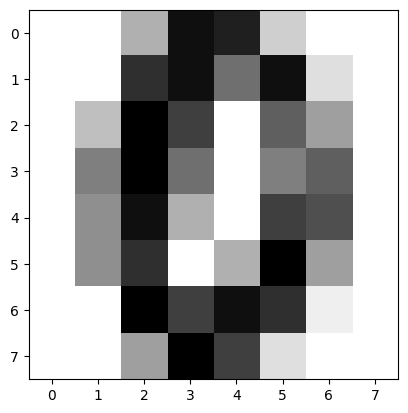

In [56]:
# Take out a data example from it
demo_digit = x[666]
print(y[666])  # 0

import matplotlib
plt.imshow(demo_digit.reshape(8, 8), cmap=matplotlib.cm.binary)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [63]:
x_train.shape[0], y_train.shape[0]

(1347, 1347)

In [65]:
KNN_classifier = KNN(6)
KNN_classifier.fit(x_train, y_train)
KNN_classifier.predict(x_test)

array([9, 8, 7, 1, 5, 5, 7, 0, 9, 1, 3, 6, 5, 6, 4, 9, 7, 0, 2, 2, 0, 9,
       1, 3, 4, 0, 8, 0, 4, 4, 7, 8, 1, 7, 5, 4, 0, 3, 8, 2, 8, 2, 8, 6,
       1, 6, 5, 1, 4, 5, 9, 9, 8, 8, 1, 5, 8, 7, 2, 9, 4, 1, 5, 3, 3, 0,
       2, 5, 8, 5, 3, 0, 6, 9, 4, 2, 5, 3, 0, 6, 1, 8, 4, 3, 9, 7, 7, 8,
       7, 4, 1, 9, 0, 4, 6, 2, 9, 6, 2, 0, 3, 9, 4, 0, 4, 9, 2, 7, 9, 6,
       8, 4, 8, 7, 7, 8, 8, 0, 6, 2, 9, 2, 6, 9, 3, 1, 8, 0, 7, 8, 5, 2,
       1, 7, 2, 5, 5, 4, 2, 9, 1, 6, 5, 7, 0, 6, 7, 8, 0, 0, 7, 1, 5, 9,
       5, 8, 3, 1, 2, 3, 5, 2, 3, 5, 2, 8, 8, 4, 4, 2, 2, 1, 8, 0, 3, 8,
       4, 8, 3, 4, 6, 2, 6, 6, 8, 6, 3, 7, 1, 0, 1, 1, 5, 4, 2, 4, 1, 7,
       9, 6, 9, 3, 8, 6, 7, 1, 4, 8, 3, 8, 0, 7, 6, 6, 4, 9, 4, 7, 4, 2,
       0, 6, 6, 8, 0, 0, 1, 1, 5, 1, 0, 9, 2, 2, 7, 1, 9, 4, 2, 6, 8, 2,
       0, 5, 9, 5, 2, 8, 7, 1, 7, 9, 4, 8, 8, 3, 3, 6, 5, 4, 9, 8, 6, 7,
       6, 7, 1, 6, 4, 2, 8, 1, 5, 2, 1, 7, 0, 7, 9, 6, 7, 3, 0, 0, 4, 7,
       3, 9, 8, 3, 3, 0, 0, 0, 7, 7, 0, 9, 1, 7, 7,

In [66]:
KNN_classifier.score(y_test)

0.98

In [92]:
# Call the accuracy of classification in scikit-learn

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [93]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [94]:
KNN_classifier.fit(x_train, y_train)

y_predict = KNN_classifier.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9866666666666667

## 超参数——Super parameters

所谓超参数，就是指在运行机器学习算法之前就需要定义好的参数。与之相对应的还有一个概念叫做模型参数，模型参数是算法过程中学习的参数。

> kNN算法没有模型参数，kNN算法中的k是典型的超参数。

寻找好的超参数：

- 领域知识
- 经验数值
- 实验搜索

In [96]:
# Find the best k in KNN algorithm
best_score, best_k = 0, -1 # Define the best score and best k
for k in range(1, 20):  # Using for traversal k for 1 to 19.
    KNN_classifier = KNeighborsClassifier(n_neighbors=k)
    KNN_classifier.fit(x_train, y_train)
    y_predict = KNN_classifier.predict(x_test)
    score = accuracy_score(y_test, y_predict)

    if score > best_score:
        best_score = score
        best_k = k


print(f'The bset k is {best_k}, the best score is {best_score}.')

The bset k is 3, the best score is 0.9866666666666667.


In [97]:
%%time
# Find the best k and the best method in KNN algorithm
best_score, best_k, best_p, best_method = 0, -1, 0, None

for method in ['uniform', 'distance']:
    for p in range(1, 6):
        for k in range(1, 20):
            KNN_classifier = KNeighborsClassifier(n_neighbors=k, weights=method, p=p)
            KNN_classifier.fit(x_train, y_train)
            y_predict = KNN_classifier.predict(x_test)
            score = accuracy_score(y_test, y_predict)

            if score > best_score:
                best_score = score
                best_k = k
                best_p = p
                best_method = method


print(
    f'The bset k is {best_k}, the best score is {best_score}, the best method is {best_method}, the best p is {best_p}.')

The bset k is 3, the best score is 0.9866666666666667, the best method is uniform, the best p is 2.
CPU times: total: 48.3 s
Wall time: 16.3 s


In [113]:
# Grid search in sklearn
para_grid = [  
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 20)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in  range(1, 6)]
    }
]


KNN_classifier = KNeighborsClassifier()

In [114]:
%%time

from sklearn.model_selection import GridSearchCV

grid_searcher = GridSearchCV(KNN_classifier, para_grid, n_jobs=-1, verbose=2)

grid_searcher.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 312 ms
Wall time: 10.3 s


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=2)

In [104]:
grid_searcher.best_score_

0.9873661021616412

In [105]:
grid_searcher.best_params_

{'n_neighbors': 9, 'p': 3, 'weights': 'distance'}

In [106]:
KNN_classifier = grid_searcher.best_estimator_
KNN_classifier.predict(x_test)

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       5, 2, 3, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 8, 7, 4, 2,
       8, 8, 7, 1, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 9, 5, 8, 7, 2, 5, 5, 9, 7, 9, 3, 1, 9, 4, 4, 1, 5, 1, 6, 4,
       4, 8, 1, 6, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 0, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 8, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 3, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       9, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 4, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 9, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [109]:
KNN_classifier.score(x_test, y_test)

0.9844444444444445

更多的距离定义
●向量空间余弦相似度Cosine Similarity
●调整余玄相似度Adjusted Cosine Similarity
皮尔森相关系数Pearson Correlation Coefficient
●Jaccard相似系数Jaccard Coefficient

## 归一化

In [116]:
# Using the scaler in scikit-learn
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
x, y = iris['data'], iris['target']

In [125]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [138]:
# Import package
from sklearn.preprocessing import StandardScaler

# Create object
scale_scaler = StandardScaler()
# Input train data set
scale_scaler.fit(x_train)

StandardScaler()

In [139]:
# Get mean and std of train data set
scale_scaler.mean_, scale_scaler.scale_

(array([5.825     , 3.09285714, 3.68571429, 1.16428571]),
 array([0.80239597, 0.4493476 , 1.75828941, 0.75543946]))

In [140]:
# Get standard train data and test data
x_train_std = scale_scaler.transform(x_train)
x_test_std = scale_scaler.transform(x_test)

In [141]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=3)
KNN_classifier.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

In [142]:
KNN_classifier.score(x_test_std, y_test), KNN_classifier.score(x_test, y_test)

(0.9736842105263158, 0.34210526315789475)

In [167]:
import numpy as np

class StandardScalerDiy:
    """
    Do it yourself: sklearn.preprocessing.StandardScaler
    """
    def __init__(self):
        self.mean_ = None
        self.scale_ = None

    def fit(self, x):
        assert x.ndim == 2, 'The dimension of x must be two.'

        self.mean_ = np.mean(x, axis=0)
        self.scale_ = np.std(x, axis=0)

        return self
    
    def transform(self, x):
        assert x.ndim == 2, 'The dimension of x must be two.'
        assert x.shape[1] == len(self.mean_), 'x must have same number of column with self.mean_.'

        return (x - self.mean_) / self.scale_